In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("D:\\Original_fuel_consumption_rating.csv")
data

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14248,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,11.9,8.3,10.3,27,237
14249,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,11.7,8.0,10.0,28,230
14250,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,11.9,8.3,10.3,27,237
14251,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,11.4,7.8,9.8,29,225


In [3]:
data.columns=['Year','Make','Engine_model','Vehicle_class','Engine_size','Cylinders','Transmission','Fuel','Consumption_city','Consumption_HWY','Consumption_comb','Combined_mpg','CO2_emissions']

In [4]:
data.head()

,Year,Make,Engine_model,Vehicle_class,Engine_size,Cylinders,Transmission,Fuel,Consumption_city,Consumption_HWY,Consumption_comb,Combined_mpg,CO2_emissions
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [5]:
Data=data[['Engine_size','Cylinders','Consumption_comb','CO2_emissions']]
Data.head()

,Engine_size,Cylinders,Consumption_comb,CO2_emissions
0,1.6,4,8.1,186
1,1.6,4,7.6,175
2,3.2,6,10.0,230
3,3.5,6,11.5,264
4,1.8,4,8.6,198


<AxesSubplot:>

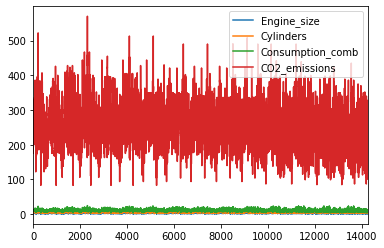

In [8]:
Data.plot()

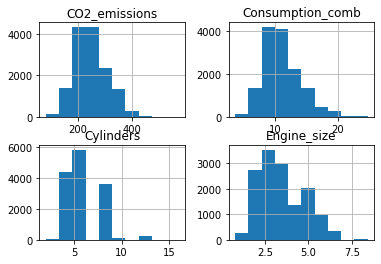

In [6]:
viz=Data[['Cylinders','Engine_size','CO2_emissions','Consumption_comb']]
viz.hist()
plt.show()

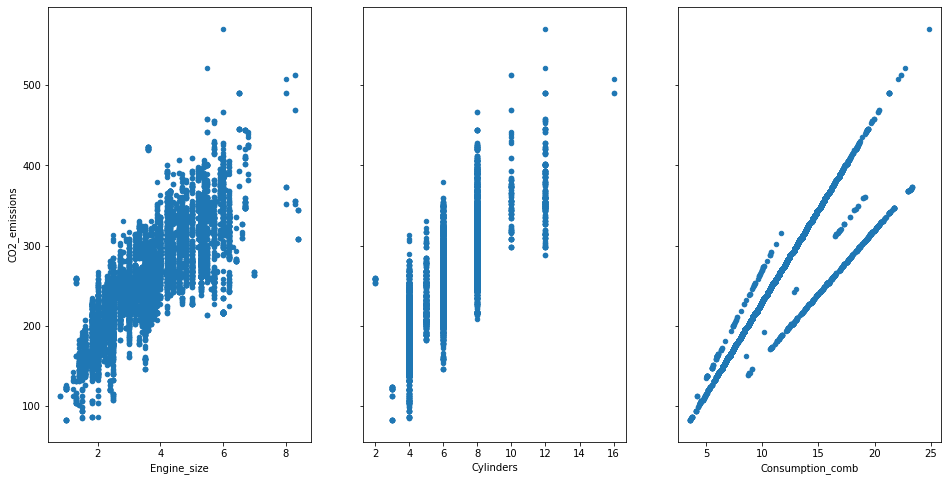

In [7]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='Engine_size', y='CO2_emissions', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Cylinders', y='CO2_emissions', ax=axs[1])
data.plot(kind='scatter', x='Consumption_comb', y='CO2_emissions', ax=axs[2])

In [8]:
X=Data[['Cylinders','Engine_size','Consumption_comb']]
X.head()

,Cylinders,Engine_size,Consumption_comb
0,4,1.6,8.1
1,4,1.6,7.6
2,6,3.2,10.0
3,6,3.5,11.5
4,4,1.8,8.6


In [9]:
Y=Data[['CO2_emissions']]
Y.head()

,CO2_emissions
0,186
1,175
2,230
3,264
4,198


In [10]:
feature_cols = ['Engine_size']
X = Data[feature_cols]
Y = Data.CO2_emissions

In [11]:
from sklearn.linear_model import LinearRegression
import sklearn.linear_model as lm
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
print(lm.intercept_)
print(lm.coef_)

119.39702652931697
[37.2049147]


In [13]:
X_new=pd.DataFrame({'Engine-size':[Data.Engine_size.min(), Data.Engine_size.max()]})
X_new

,Engine-size
0,0.8
1,8.4


In [14]:
preds = lm.predict(X_new)
preds

array([149.16095829, 431.91831004])

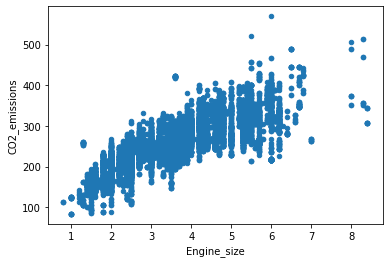

In [15]:
Data.plot(kind='scatter', x='Engine_size', y='CO2_emissions')

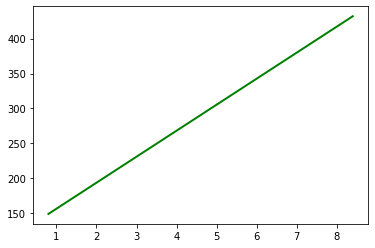

In [16]:
plt.plot(X_new, preds, c='green', linewidth=2)

In [17]:
feature_cols = ['Cylinders']
X = Data[feature_cols]
Y = Data.CO2_emissions

In [18]:
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
print(lm.intercept_)
print(lm.coef_)

90.13590151478002
[26.48108154]


In [20]:
X_new=pd.DataFrame({'Cylinders':[Data.Cylinders.min(), Data.Cylinders.max()]})
X_new

,Cylinders
0,2
1,16


In [21]:
preds = lm.predict(X_new)
preds

array([143.09806459, 513.83320611])

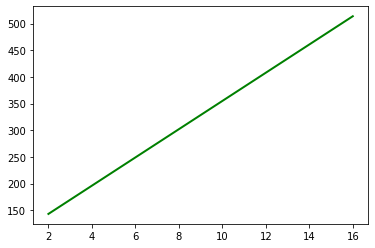

In [22]:
plt.plot(X_new, preds, c='green', linewidth=2)

In [23]:
feature_cols = ['Consumption_comb']
X = Data[feature_cols]
Y = Data.CO2_emissions

In [24]:
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
print(lm.intercept_)
print(lm.coef_)

46.42564164010457
[18.24807276]


In [26]:
X_new=pd.DataFrame({'Consumption_comb':[Data.Consumption_comb.min(), Data.Consumption_comb.max()]})
X_new

,Consumption_comb
0,3.6
1,24.8


In [27]:
preds = lm.predict(X_new)
preds

array([112.11870359, 498.97784615])

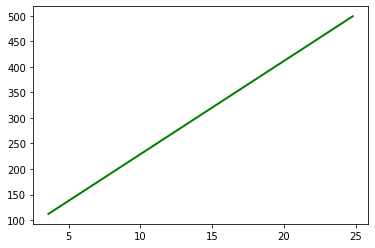

In [28]:
plt.plot(X_new, preds, c='green', linewidth=2)

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2)

In [30]:
X_train.head()

,Consumption_comb
2956,10.6
9746,6.9
1076,10.2
82,14.4
11540,16.3


In [31]:
X_train.shape

(11402, 1)

In [32]:
X_test.shape

(2851, 1)

In [33]:
Y_train.shape

(11402,)

In [34]:
Y_test.shape

(2851,)

In [35]:
#Z_train=X_train + Y_train

In [36]:
#Z_train.shape

(11402, 11403)

---

In [35]:
from sklearn.linear_model import LinearRegression
import sklearn.linear_model as lm
lm = LinearRegression()
lm.fit(X_train, Y_train,)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
print(lm.intercept_)
print(lm.coef_)

45.68932535790117
[18.32434598]


In [37]:
accuracy=lm.score(X_train, Y_train)
print('accuracy=', accuracy)

accuracy= 0.842910187945651


In [38]:
lm=LinearRegression()
lm.fit(X_test,Y_test)
new_predict=lm.predict(X_test)
new_predict

array([174.92250309, 221.60141232, 248.53155226, ..., 200.05730037,
       225.19209765, 239.55483895])

In [39]:
Table=pd.DataFrame({'Actual': Y_test, 'Predicted': new_predict})
Table

,Actual,Predicted
4103,161,174.922503
13730,221,221.601412
7870,255,248.531552
1857,301,284.438406
998,242,237.759496
...,...,...
489,258,250.326895
12425,393,356.252112
2015,193,200.057300
4769,225,225.192098


In [43]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [46]:
Y_pred = regressor.predict(X_test)
Y_pred

array([161.        , 221.17272727, 254.58602151, ..., 193.62962963,
       225.33898305, 244.        ])

In [47]:
df=pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df

,Actual,Predicted
4103,161,161.000000
13730,221,221.172727
7870,255,254.586022
1857,301,294.815534
998,242,242.000000
...,...,...
489,258,258.280255
12425,393,387.333333
2015,193,193.629630
4769,225,225.338983


---

In [40]:
#import statsmodels.formula.api as smf
#lm = smf.ols(formula='Y_train ~ X_train', data=Z_train).fit()
#lm.conf_int()

,0,1
Intercept,45.374562,48.732765
X_train,18.043004,18.334919


In [41]:
#lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Y_train   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                 5.967e+04
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:22:39   Log-Likelihood:                -52267.
No. Observations:               11402   AIC:                         1.045e+05
Df Residuals:                   11400   BIC:                         1.046e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.0537      0.857     54.930      0.000      45.375      48.733
X_train       18.1890      0.074    244.273      0.000      18.043      18.335
==============================================================================
Omnibus:                     5313.587   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28792.919
Skew:                          -2.238   Prob(JB):                         0.00
Kurtosis:                       9.369   Cond. No.                         44.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
#lm.pvalues

Intercept    0.0
X_train      0.0
dtype: float64

In [43]:
#lm.rsquared

0.8395931020373695

---

In [51]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [52]:
print('R2_values', r2_score(Y_test,new_predict))

R2_values 0.8352745283690943


In [53]:
print("Mean_absolute_error is: ", mean_absolute_error(Y_test, new_predict))

Mean_absolute_error is:  14.673253463218273


In [54]:
print('mean_squared_error is: ', mean_squared_error(Y_test, new_predict))

mean_squared_error is:  577.8555783036498


In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
cv_result=cross_val_score(lm, X_train, Y_train, cv=20)
cv_result

array([0.84623385, 0.85415804, 0.86744539, 0.83033378, 0.84030935,
       0.85081959, 0.86011531, 0.87409973, 0.85085246, 0.8071441 ,
       0.8192069 , 0.83871306, 0.83879151, 0.84236128, 0.83416058,
       0.83103866, 0.8238415 , 0.83564477, 0.86138542, 0.8421761 ])

In [58]:
print('Average accuracy: ', np.mean(cv_result))

Average accuracy:  0.8424415678505934


In [59]:
print('Maximum accuracy: ',np.max(cv_result))

Maximum accuracy:  0.874099728913635


In [60]:
print('Minimum accuracy: ',np.min(cv_result))

Minimum accuracy:  0.8071440989135769


In [62]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, Y_train)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [63]:
Y_preds = regressor.predict(X_test)
Y_preds

array([161.        , 221.19597584, 254.64379626, ..., 193.78564438,
       225.36071199, 244.        ])

In [64]:
df=pd.DataFrame({'Actual': Y_test, 'Predicted': Y_preds})
df

,Actual,Predicted
4103,161,161.000000
13730,221,221.195976
7870,255,254.643796
1857,301,294.843879
998,242,242.000000
...,...,...
489,258,258.444279
12425,393,386.609505
2015,193,193.785644
4769,225,225.360712
